In [312]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [313]:
sns.set(rc={
    'figure.figsize':(12,10),
})

plt.style.use("Solarize_Light2")

In [314]:
tracks_lf = pl.scan_csv('data/music-info-clean.csv').with_columns(
    pl.col('genres').str.split(';').alias('genres')
)

tracks_lf.fetch(5)

track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount
str,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,list[str],i64
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"[""alternative_rock"", ""alternative"", … ""funk""]",990
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"[""hip_hop"", ""electronic"", … ""trip_hop""]",98
"""TRIQWYH128F148…","""Paranoid Andro…","""Radiohead""","""https://p.scdn…","""0bomiLGPTUNyk3…",2012,384933,0.232,0.8,5,-6.863,1,0.0573,0.0523,0.00606,0.118,0.299,81.849,4,"[""90s"", ""british"", … ""progressive_rock""]",1075
"""TRUOEWJ128F934…","""Stairway to He…","""Led Zeppelin""","""https://p.scdn…","""03hLW9osM6UuNq…",2013,488019,0.354,0.361,9,-12.722,0,0.0509,0.625,0.0112,0.35,0.212,80.36,4,"[""classic_rock"", ""rock"", … ""punk""]",566
"""TRNNGMK128F423…","""Where Is My Mi…","""Pixies""","""https://p.scdn…","""0DJU6KGwdkxEPC…",2005,230093,0.514,0.435,4,-13.517,1,0.0353,0.0078,0.000859,0.0802,0.212,82.104,4,"[""indie_rock"", ""alternative_rock"", … ""alternative""]",32185


In [315]:
tracks_lf.collect().describe()

describe,track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount
str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64
"""count""","""29348""","""29348""","""29348""","""29348""","""29348""",29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,29348.0,"""29348""",29348.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0
"""mean""",null,null,null,null,null,2004.017105,251432.472298,0.482911,0.696949,5.316887,-8.160405,0.62546,0.077102,0.200784,0.240588,0.214206,0.417984,123.933038,3.892599,null,856.11367
"""std""",null,null,null,null,null,8.104367,107532.278357,0.180161,0.251474,3.566917,4.549231,0.484012,0.076147,0.296325,0.34372,0.180267,0.256187,29.753906,0.433756,null,4294.929615
"""min""","""TRAAAED128E078…","""#1""","""!!!""","""https://p.scdn…","""0000korRHja9p9…",1900.0,1439.0,0.0,0.0,0.0,-60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,null,1.0
"""max""","""TRZZZRJ128F428…","""鼓動""","""소녀시대""","""https://p.scdn…","""7zv1oGrjcxIG7e…",2020.0,2.51092e6,0.986,1.0,11.0,3.642,1.0,0.954,0.996,0.999,0.998,0.989,238.895,5.0,null,527893.0
"""median""",null,null,null,null,null,2006.0,235261.0,0.485,0.76,5.0,-7.043,1.0,0.0489,0.0302,0.00961,0.138,0.386,122.1375,4.0,null,139.0
"""25%""",null,null,null,null,null,2001.0,192906.0,0.349,0.526,2.0,-10.174,0.0,0.0355,0.000952,0.0000276,0.0985,0.2,101.189,4.0,null,29.0
"""75%""",null,null,null,null,null,2009.0,289293.0,0.612,0.914,9.0,-4.988,1.0,0.0856,0.303,0.509,0.291,0.611,142.313,4.0,null,606.0


In [316]:
def get_column(lf: pl.LazyFrame, name: str) -> np.ndarray:
    return lf.select(pl.col(name)).collect().to_numpy().flatten()

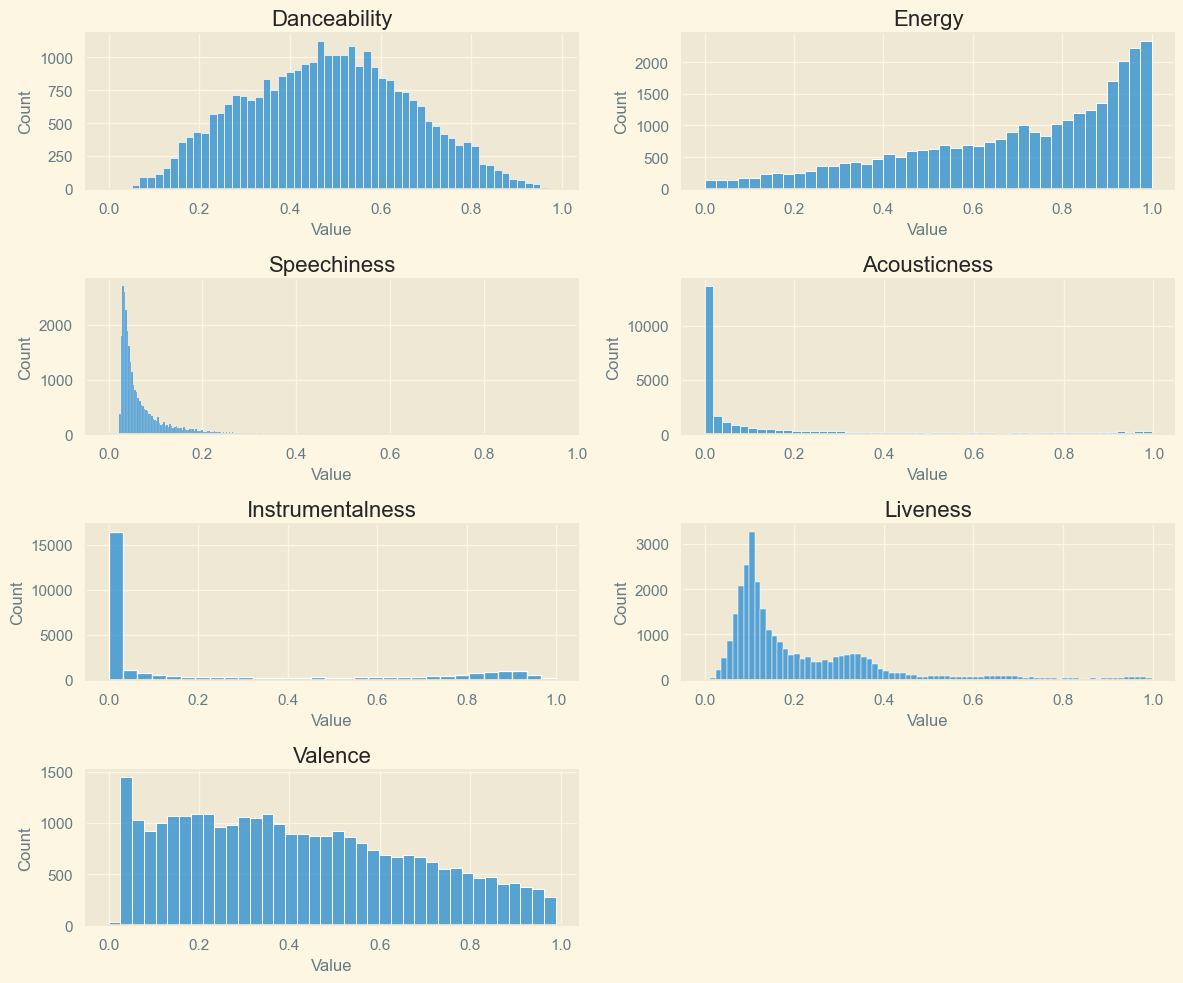

In [317]:
attributes = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence'
]

N = 8
fig, axes  = plt.subplots(nrows= N // 2, ncols=2)

for i, attribute in enumerate(attributes):
    ax: plt.Axes = axes[i // 2, i % 2]
    sns.histplot(x = get_column(tracks_lf, attribute), ax=ax)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')
    ax.set_title(attribute.capitalize())

axes[N // 2 - 1, 2 - 1].remove()

plt.tight_layout()
plt.show()

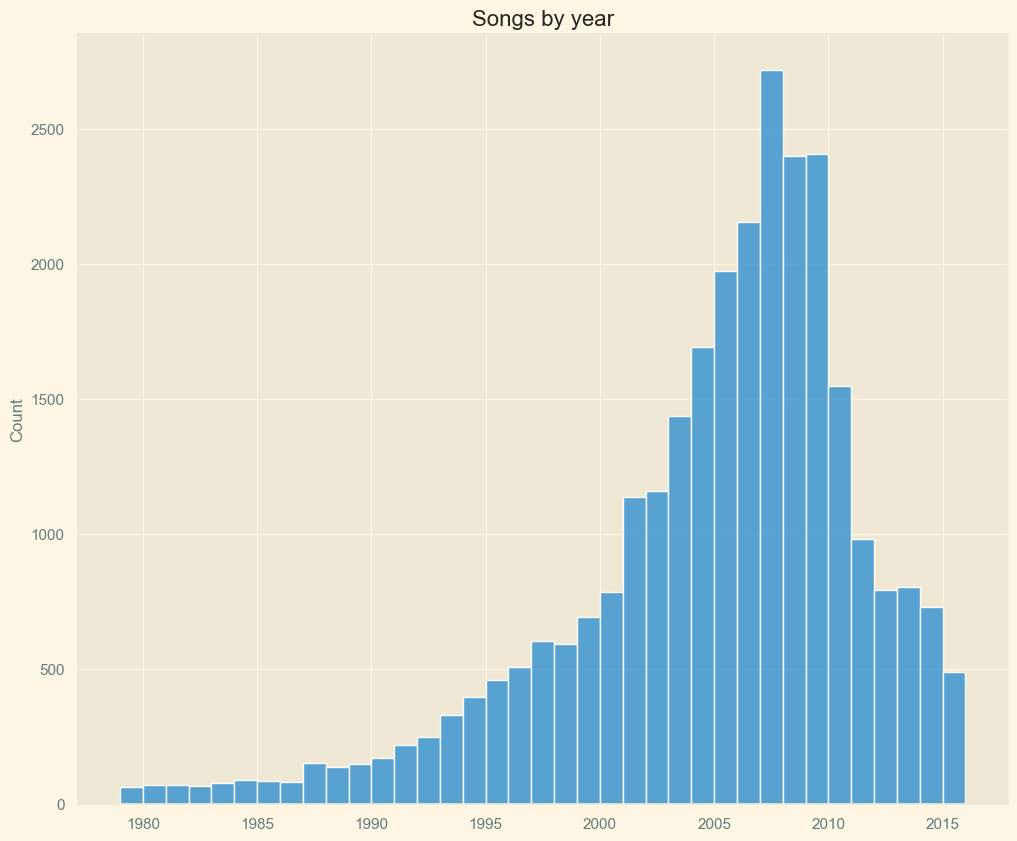

In [318]:
outlier_offset = 0.02

years_lf = tracks_lf.select([
    pl.col('year'),
    pl.col('playcount')
]).filter(
    pl.col('year').is_between(
        pl.col('year').quantile(outlier_offset),
        pl.col('year').quantile(1 - outlier_offset)
    )
)

sns.histplot(x = get_column(years_lf, 'year'), binwidth=1)
plt.title('Songs by year')
plt.show()

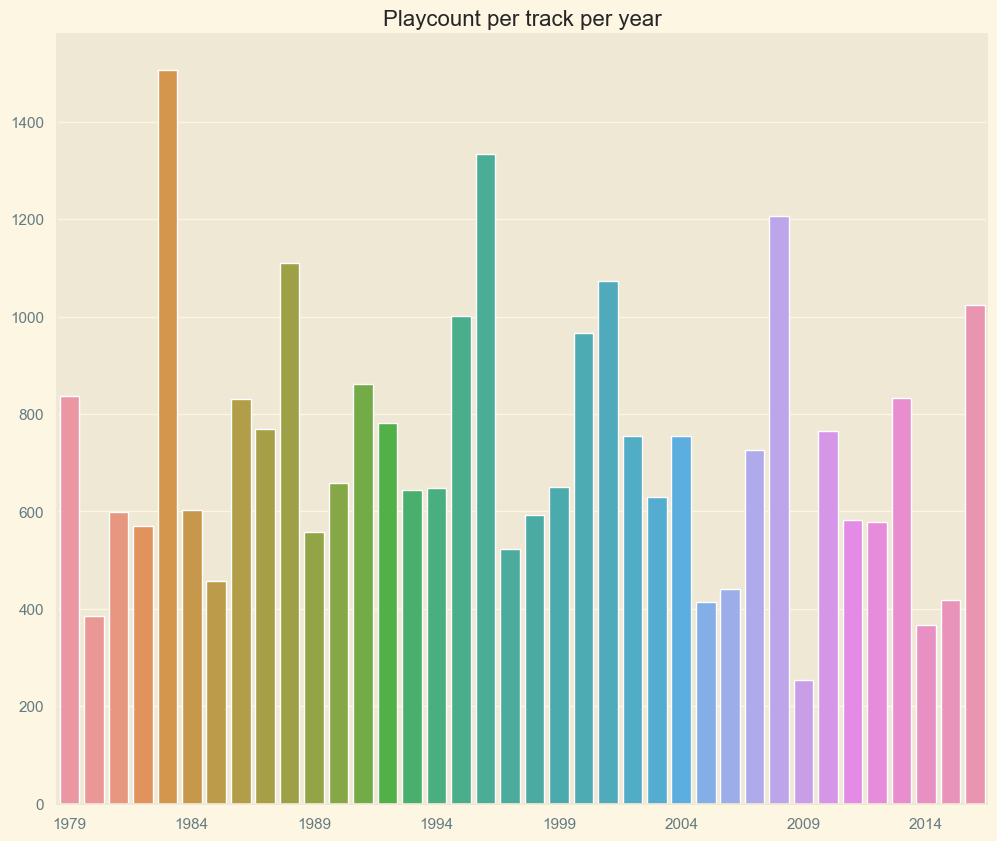

In [319]:
most_popular_years_lf = years_lf.groupby('year').agg([
    pl.sum('playcount').alias('all playcount'),
    pl.count()
]).with_columns([
    (pl.col('all playcount') / pl.col('count')).alias('playcount per track')
])

years = get_column(most_popular_years_lf, 'year')

ax = sns.barplot(x = years, y = get_column(most_popular_years_lf, 'playcount per track'))

step = 5
target_ticks_range = np.arange(years.min(), years.max() + 1, step)
current_ticks = ax.get_xticks()
current_ticks_range = np.arange(current_ticks.min(), current_ticks.max() + 1, step)

ax.set_xticks(current_ticks_range)
ax.set_xticklabels([plt.Text(x, 0, target_ticks_range[i]) for i, x in enumerate(current_ticks_range)])

plt.title('Playcount per track per year')
plt.show()

In [320]:
artist_popularity_lf = tracks_lf.select([
    pl.col('artist'),
    pl.col('playcount')
]).groupby('artist').sum().join(
    other=tracks_lf.select('artist').groupby('artist').count().rename({'count':'tracks'}),
    on='artist'
).sort(by='playcount', descending=True)

artist_popularity_lf.collect()

artist,playcount,tracks
str,i64,u32
"""Kings of Leon""",597299,20
"""The Black Keys…",336178,53
"""Justin Bieber""",231001,18
"""Coldplay""",203320,43
"""Radiohead""",179341,64
"""Jack Johnson""",177147,32
"""Modest Mouse""",174356,42
"""Metallica""",166292,53
"""John Mayer""",160425,19


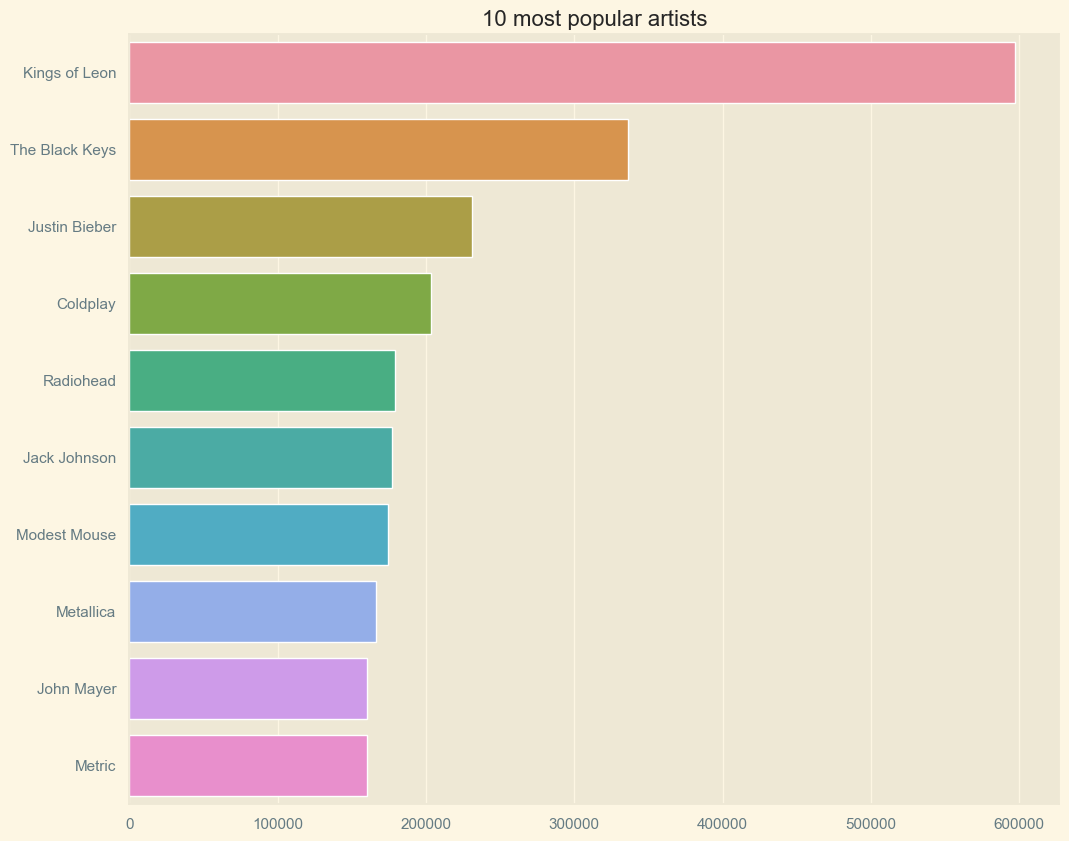

In [321]:
top_artists_lf = artist_popularity_lf.head(10)
sns.barplot(y=get_column(top_artists_lf, 'artist'), x=get_column(top_artists_lf, 'playcount'), orient='h')

plt.title('10 most popular artists')
plt.show()

In [322]:
top1_artist = top_artists_lf.select(pl.col('artist')).head(1).collect().item()
print('Artist with the highest playcount is "{}"'.format(top1_artist))

top1_artist_tracks_lf = tracks_lf.select([
    pl.col('name'),
    pl.col('artist'),
    pl.col('playcount')
]).filter(
    pl.col('artist') == top1_artist
).sort('playcount', descending=True)
top1_artist_tracks_lf.collect()

Artist with the highest playcount is "Kings of Leon"


name,artist,playcount
str,str,i64
"""Revelry""","""Kings of Leon""",527893
"""Molly's Chambe…","""Kings of Leon""",20761
"""Ragoo""","""Kings of Leon""",12494
"""Joe's Head""","""Kings of Leon""",7269
"""California Wai…","""Kings of Leon""",5614
"""Velvet Snow""","""Kings of Leon""",4890
"""Rememo""","""Kings of Leon""",4483
"""Charmer""","""Kings of Leon""",4280
"""Trani""","""Kings of Leon""",3650


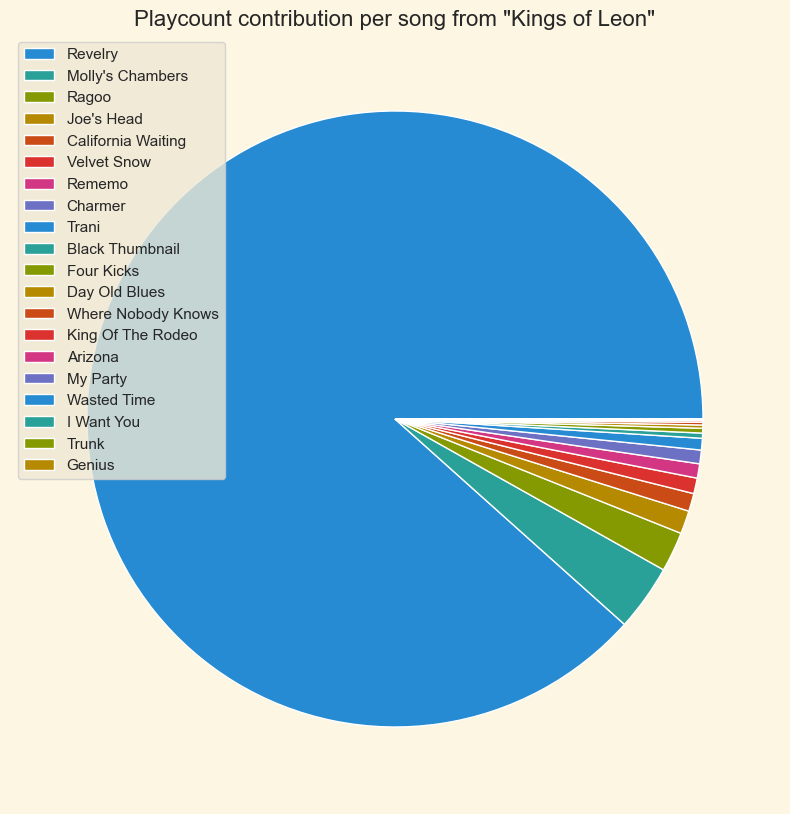

In [323]:
plt.pie(get_column(top1_artist_tracks_lf, 'playcount'))
plt.legend(labels=get_column(top1_artist_tracks_lf, 'name'))

plt.title('Playcount contribution per song from "{}"'.format(top1_artist))
plt.show()

In [324]:
tracks_lf.select([
    pl.col('artist'),
    pl.col('name'),
    pl.col('playcount'),
]).sort(by='playcount', descending=True).limit(10).collect()

artist,name,playcount
str,str,i64
"""Kings of Leon""","""Revelry""",527893
"""Lady Gaga""","""Alejandro""",111615
"""Miss May I""","""Gears""",111596
"""Depeche Mode""","""Halo""",91461
"""Katherine Jenk…","""Bring Me To Li…",91448
"""John Mayer""","""Heartbreak War…",87745
"""Sabaton""","""Uprising""",87050
"""Modest Mouse""","""Float On""",85079
"""The Barden Bel…","""Party In The U…",78443


In [325]:
with open('tmp/tag-list-filtered.txt', 'r') as f:
    genre_list = f.read().split('\n')

tracks_genres_lf = tracks_lf.explode('genres').rename({'genres':'genre'}).filter(pl.col('genre').is_in(genre_list))
tracks_genres_lf.collect()

track_id,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre,playcount
str,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,str,i64
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""alternative_ro…",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""pop""",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""rock""",990
"""TRIODZU128E078…","""Under the Brid…","""Red Hot Chili …","""https://p.scdn…","""06zh28PcYIFvNO…",2003,265506,0.554,0.49,4,-8.046,1,0.0457,0.0168,0.000534,0.136,0.513,84.275,4,"""funk""",990
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""hip_hop""",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""electronic""",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""rock""",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""rnb""",98
"""TRYEZGE128F92D…","""Feel Good Inc.…","""Gorillaz""","""https://p.scdn…","""09xrHi86kLkEIz…",2010,223106,0.809,0.72,6,-7.776,1,0.136,0.0337,0.00141,0.826,0.832,138.556,4,"""pop""",98


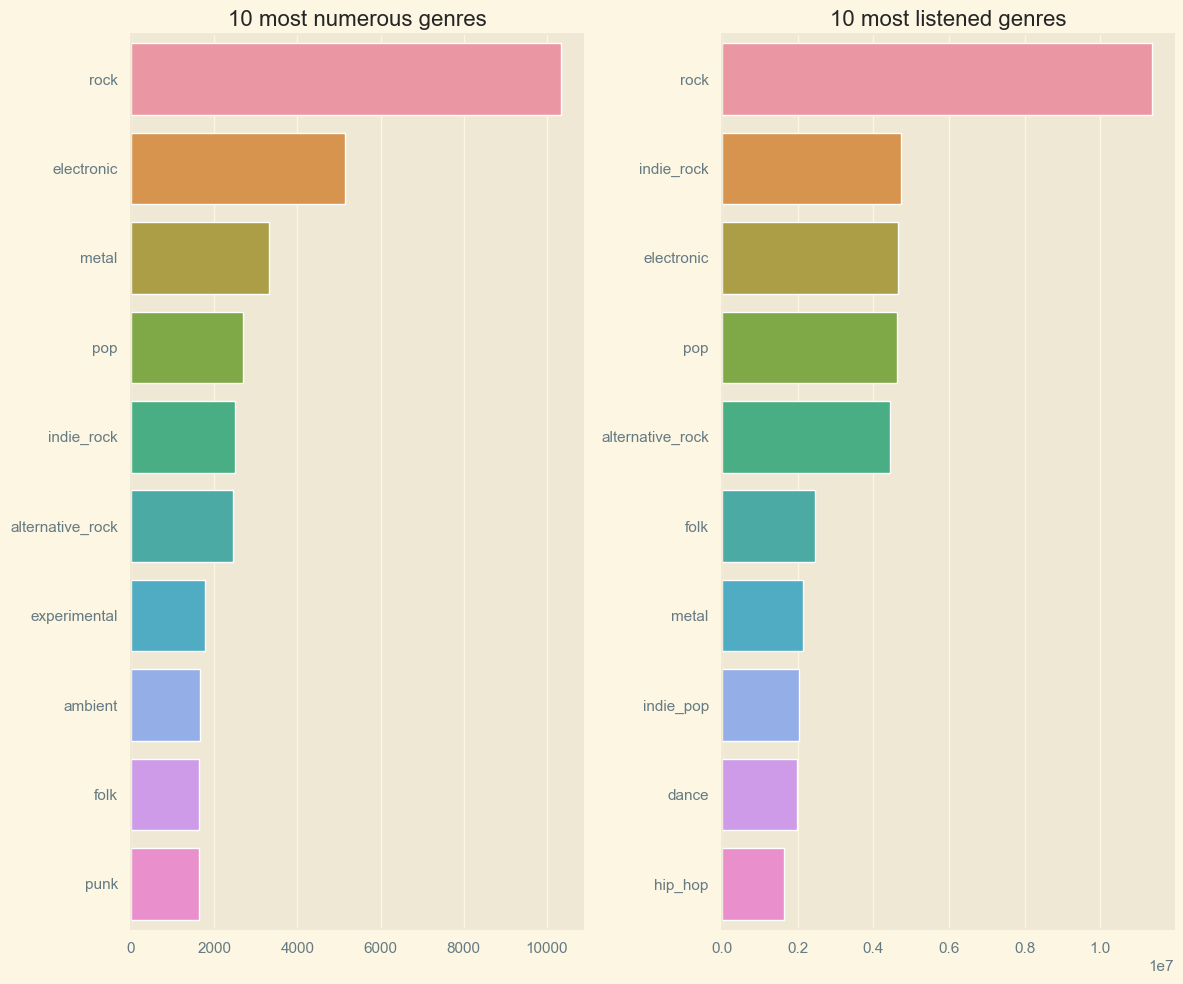

In [326]:
fig, axes = plt.subplots(ncols=2)

genre_counts_lf = tracks_genres_lf.groupby('genre').count().sort(by='count', descending=True).limit(10)
sns.barplot(orient='h', x = get_column(genre_counts_lf, 'count'), y = get_column(genre_counts_lf, 'genre'), ax=axes[0])
axes[0].set_title('10 most numerous genres')

genre_counts_lf = tracks_genres_lf.select([
    pl.col('genre'),
    pl.col('playcount')
]).groupby('genre').sum().sort(by='playcount', descending=True).limit(10)
sns.barplot(orient='h', x = get_column(genre_counts_lf, 'playcount'), y = get_column(genre_counts_lf, 'genre'), ax=axes[1])
axes[1].set_title('10 most listened genres')

plt.tight_layout()
plt.show()

In [327]:
accepted_tracks = tracks_lf.select('track_id').unique().collect().to_series()

history_lf = pl.scan_csv('data/User Listening History.csv').filter(pl.col('track_id').is_in(accepted_tracks))
history_lf.fetch(5)

track_id,user_id,playcount
str,str,i64
"""TRIRLYL128F425…","""b80344d063b5cc…",1
"""TRFUPBA128F934…","""b80344d063b5cc…",1
"""TRLQPQJ128F42A…","""b80344d063b5cc…",1
"""TRTUCUY128F92E…","""b80344d063b5cc…",1
"""TRHDDQG12903CB…","""b80344d063b5cc…",1


In [328]:
print('Dataset has {} records'.format(history_lf.select(pl.count()).collect().item()))

Dataset has 9560063 records


In [329]:
print('Dataset has info from {} unique users'.format(history_lf.select(pl.col('user_id').unique().count()).collect().item()))

Dataset has info from 959553 unique users


In [330]:
user_to_track_counts = history_lf.groupby('user_id').count()

In [331]:
user_to_track_counts.select('count').collect().describe()

describe,count
str,f64
"""count""",959553.0
"""null_count""",0.0
"""mean""",9.963038
"""std""",14.375271
"""min""",1.0
"""max""",757.0
"""median""",5.0
"""25%""",3.0
"""75%""",11.0


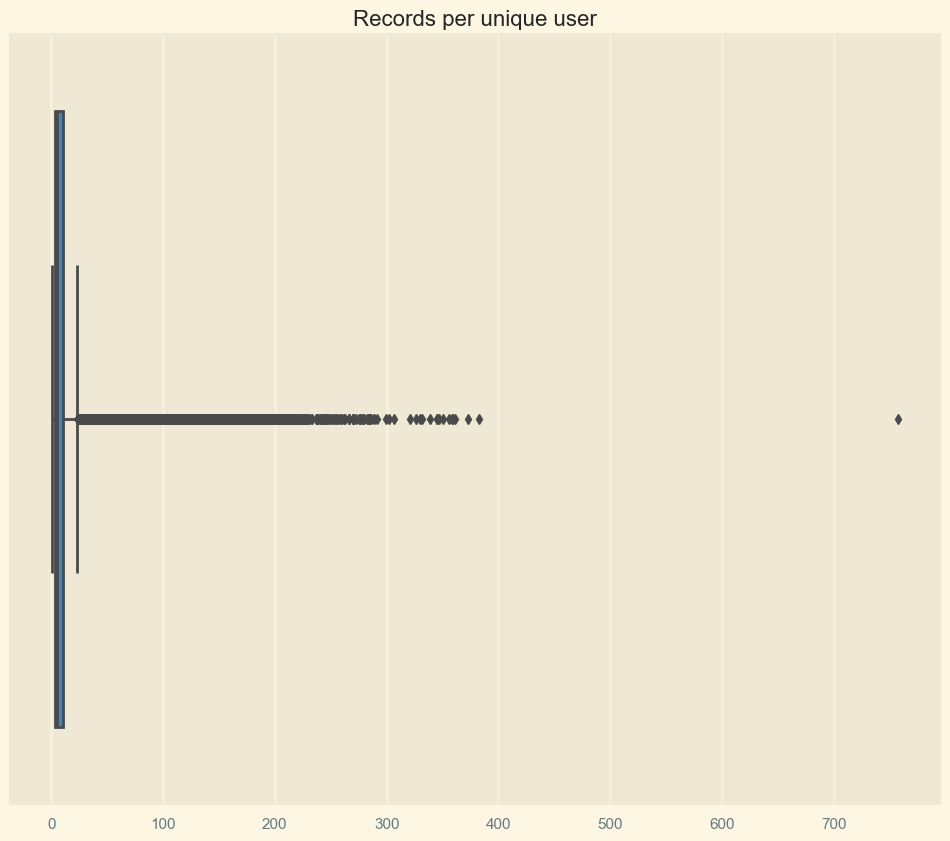

In [332]:
sns.boxplot(x=get_column(user_to_track_counts, 'count'))

plt.title('Records per unique user')
plt.show()

In [333]:
user_playcounts = history_lf.groupby('user_id').agg([
    pl.sum('playcount').alias('total playcount')
])

In [334]:
user_playcounts.select('total playcount').collect().describe()

describe,total playcount
str,f64
"""count""",959553.0
"""null_count""",0.0
"""mean""",26.1843
"""std""",43.59976
"""min""",1.0
"""max""",2953.0
"""median""",12.0
"""25%""",5.0
"""75%""",30.0


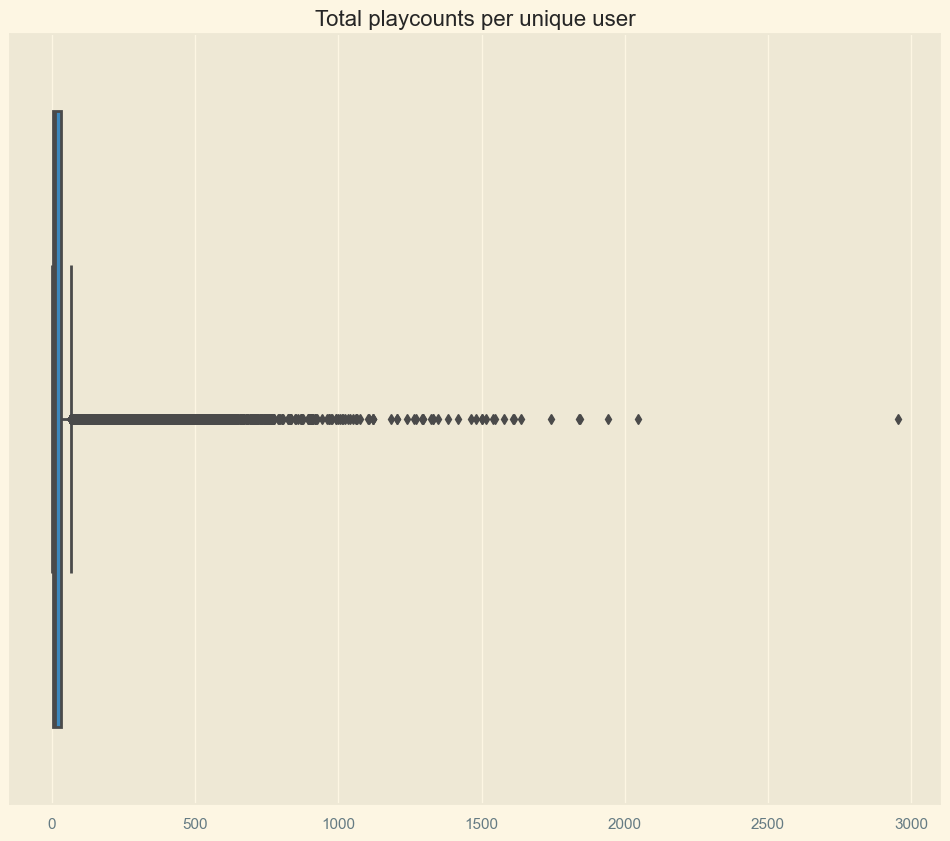

In [335]:
sns.boxplot(x=get_column(user_playcounts, 'total playcount'))

plt.title('Total playcounts per unique user')
plt.show()

In [336]:
highest_count_user_id = user_to_track_counts.filter(pl.col('count') == pl.col('count').max()).select('user_id').limit(1).collect().item()
print('"{}" is the user ID with the most relations to tracks registered'.format(highest_count_user_id))

"ec6dfcf19485cb011e0b22637075037aae34cf26" is the user ID with the most relations to tracks registered


In [337]:
highest_playcount_user_id = user_playcounts.filter(pl.col('total playcount') == pl.col('total playcount').max()).select('user_id').limit(1).collect().item()

history_lf.filter(pl.col('user_id') == highest_playcount_user_id).join(tracks_lf, on='track_id').collect()

track_id,user_id,playcount,name,artist,spotify_preview_url,spotify_id,year,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genres,playcount_right
str,str,i64,str,str,str,str,i64,i64,f64,f64,i64,f64,i64,f64,f64,f64,f64,f64,f64,i64,list[str],i64
"""TRUBSZM128F422…","""1854daf178674b…",2948,"""Sweet Escape""","""Alesso""","""https://p.scdn…","""0Wz6vFHimAwaU2…",2016,231160,0.572,0.839,2,-3.811,1,0.0427,0.0772,0.000001,0.128,0.483,126.013,4,"[""pop"", ""dance"", ""trance""]",6857
"""TRABQJG128F426…","""1854daf178674b…",3,"""You Sang To Me…","""Marc Anthony""","""https://p.scdn…","""0mGlP2CU9IwOQ3…",1999,347333,0.567,0.889,10,-5.4,1,0.0284,0.011,0.000003,0.234,0.757,165.977,4,"[""pop"", ""male_vocalists"", ""love""]",2842
"""TRYGFKV128F422…","""1854daf178674b…",1,"""Embraced""","""Paradise Lost""","""https://p.scdn…","""24tHSl9YlkN3H6…",2012,268666,0.216,0.834,7,-12.156,1,0.0613,0.000723,0.0413,0.0807,0.302,182.706,4,"[""doom_metal"", ""gothic_metal""]",1988
"""TRNFNDQ128F422…","""1854daf178674b…",1,"""Sacred Nature""","""Paul Cardall""","""https://p.scdn…","""19FtwlWwWZ5cM4…",2003,200773,0.302,0.0659,9,-20.01,0,0.0336,0.966,0.864,0.111,0.0353,114.705,4,"[""piano"", ""new_age""]",2245


Most of the user playcounts come from a single track.
It's either an anomaly or a big trance fan.

In [338]:
with open('tmp/highest-count-user-id.txt', 'w+') as f:
    f.write(highest_count_user_id)

In [370]:
genres_per_year_lf = tracks_genres_lf.groupby([pl.col('year'), pl.col('genre')]).count().sort('count', descending=True).filter(
    pl.col('year').is_between(
        pl.col('year').quantile(outlier_offset),
        pl.col('year').quantile(1 - outlier_offset)
    )
)
genres_per_year_lf.limit(5).collect()

year,genre,count
i64,str,u32
2007,"""rock""",970
2008,"""rock""",806
2005,"""rock""",725
2006,"""rock""",724
2009,"""rock""",722


In [353]:
def get_genre_timeline(genre: str) -> np.ndarray:
    return genres_per_year_lf.filter(pl.col('genre') == genre).select([pl.col('year'), pl.col('count')]).sort(by='year').collect().to_numpy()

In [371]:
get_genre_timeline('rock')[:5]

array([[1966,   15],
       [1967,   29],
       [1968,   23],
       [1969,   19],
       [1970,   31]], dtype=int64)

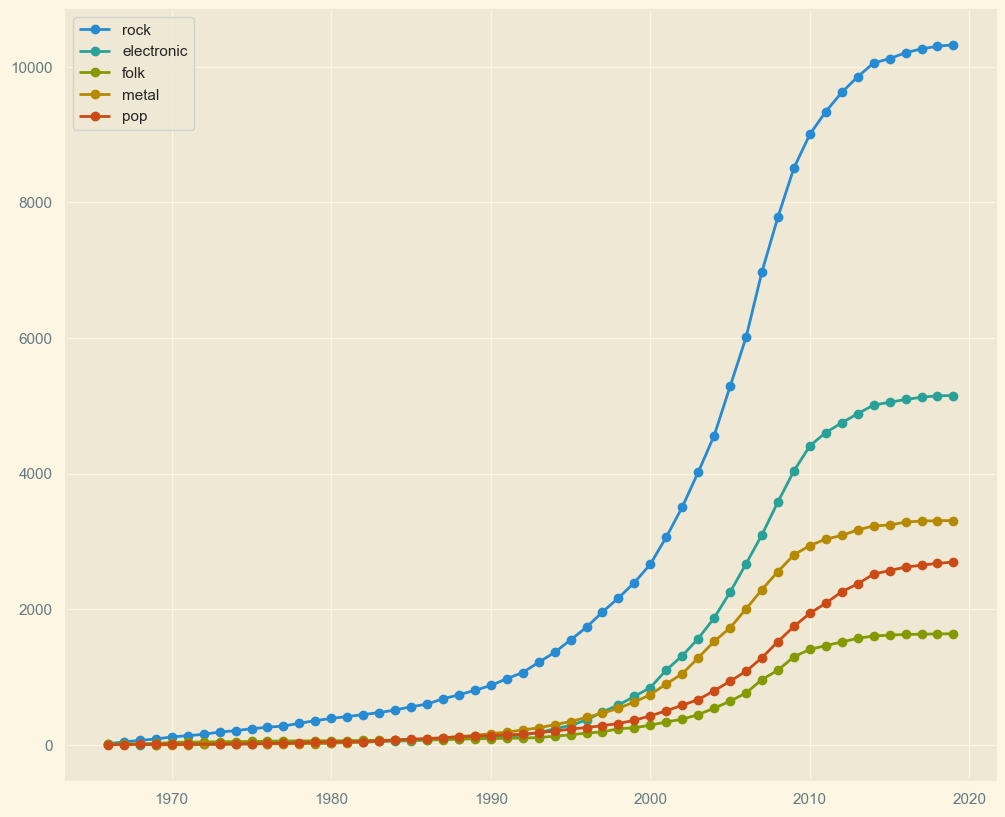

In [392]:
genres_to_check = [
    'rock',
    'electronic',
    'folk',
    'metal',
    'pop'
]

_, ax = plt.subplots()

for genre_to_check in genres_to_check:
    timeline = get_genre_timeline(genre_to_check)
    years = timeline[:,0]
    cumsum = timeline[:,1].cumsum()
    #sns.lineplot(x=years, y=cumsum, marker='o', ax=ax)
    plt.plot(years, cumsum, marker='o', label=genre_to_check)

plt.legend()
plt.show()